## Reinforcement Learning (RL)


Reinforcement Learning (Обучение с подкреплением) — это класс машинного обучения, в котором агент обучается принимать решения путем взаимодействия с окружающей средой. Агент принимает действия, получает обратную связь в виде вознаграждения или штрафа, и стремится максимизировать кумулятивное вознаграждение.

## Q-learning
[Q-learning](https://en.wikipedia.org/wiki/Q-learning) — это один из методов обучения с подкреплением, используемый для обучения агента принимать оптимальные действия в конкретной среде. Агент стремится выучить функцию Q, которая оценивает ожидаемую награду для каждой пары состояние-действие.

## Тестирование и Валидация

В контексте RL, тестирование и валидация играют важную роль. После обучения модели агента необходимо оценить ее производительность (тестирование) и убедиться в ее способности обобщения к различным ситуациям (валидация).

Тестирование в RL включает в себя запуск обученной модели в реальной среде и измерение ее производительности на основе определенных метрик. Валидация, с другой стороны, может включать в себя проверку способности модели адаптироваться к новым условиям или изменениям в среде.


### Установка зависимостей

На первом шаге мы начинаем с установки необходимых библиотек. Пакет [gymnasium](https://en.wikipedia.org/wiki/Q-learning#Deep_Q-learning) предоставляет различные среды для обучения с подкреплением, в то время как [stable-baselines3](https://en.wikipedia.org/wiki/Q-learning#Deep_Q-learning) предоставляет реализации различных алгоритмов обучения с подкреплением.


Эти пакеты будут использованы в дальнейшем коде для создания среды и реализации алгоритма обучения с подкреплением.

In [ ]:
# Установка необходимых библиотек
!pip install swig
!pip install gymnasium[box2d]
!pip install stable-baselines3
!pip install PyVirtualDisplay
!sudo apt-get install xvfb

После установки мы импортируем два основных модуля: gym и [DQN](https://en.wikipedia.org/wiki/Q-learning#Deep_Q-learning) из stable_baselines3. gym предоставляет инструменты для создания и использования различных сред для обучения агента, в то время как DQN (Deep Q-Network) представляет собой алгоритм Q-learning с использованием нейронных сетей для оценки функции Q.

In [ ]:
# Импорт необходимых пакетов
import gymnasium as gym
from stable_baselines3 import DQN

In [ ]:
gym.envs.registration.registry.keys()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


dict_keys(['CartPole-v0', 'CartPole-v1', 'MountainCar-v0', 'MountainCarContinuous-v0', 'Pendulum-v1', 'Acrobot-v1', 'phys2d/CartPole-v0', 'phys2d/CartPole-v1', 'phys2d/Pendulum-v0', 'LunarLander-v2', 'LunarLanderContinuous-v2', 'BipedalWalker-v3', 'BipedalWalkerHardcore-v3', 'CarRacing-v2', 'Blackjack-v1', 'FrozenLake-v1', 'FrozenLake8x8-v1', 'CliffWalking-v0', 'Taxi-v3', 'tabular/Blackjack-v0', 'tabular/CliffWalking-v0', 'Reacher-v2', 'Reacher-v4', 'Pusher-v2', 'Pusher-v4', 'InvertedPendulum-v2', 'InvertedPendulum-v4', 'InvertedDoublePendulum-v2', 'InvertedDoublePendulum-v4', 'HalfCheetah-v2', 'HalfCheetah-v3', 'HalfCheetah-v4', 'Hopper-v2', 'Hopper-v3', 'Hopper-v4', 'Swimmer-v2', 'Swimmer-v3', 'Swimmer-v4', 'Walker2d-v2', 'Walker2d-v3', 'Walker2d-v4', 'Ant-v2', 'Ant-v3', 'Ant-v4', 'Humanoid-v2', 'Humanoid-v3', 'Humanoid-v4', 'HumanoidStandup-v2', 'HumanoidStandup-v4', 'GymV21Environment-v0', 'GymV26Environment-v0'])

### Выбор среды
Давайте определим задачу, которую мы будем решать, используя алгоритм Q-learning и библиотеки gym и stable-baselines3. В данной работе мы будем использовать среду [LunarLander-v2](https://www.gymlibrary.dev/environments/box2d/lunar_lander/), предоставляемую Gym. Эта задача заключается в управлении тележкой таким образом, чтобы удерживать шест в вертикальном положении.


#### Создание среды LunarLander

Мы используем метод gym.make() для создания среды с именем 'LunarLander-v2'. Эта среда предоставляет задачу с тележкой и шестом.

In [ ]:
ENV_NAME = "LunarLander-v2"

In [ ]:
# Создание среды
env = gym.make(ENV_NAME, render_mode="rgb_array")

#### Описание задачи
Мы сохраняем информацию о пространстве наблюдений (observation_space) и пространстве действий (action_space). observation_space представляет собой пространство всех возможных состояний в задаче, а action_space - пространство всех возможных действий, которые агент может предпринять.

In [ ]:
# Описание задачи
observation_space = env.observation_space
action_space = env.action_space

Эти шаги предварительно готовят нас к использованию выбранной среды для обучения и тестирования агента с использованием алгоритма Q-learning.

### Решение задачи
На этом шаге мы используем алгоритм Q-learning, представленный в stable-baselines3, для решения задачи LunarLander-v2. Давайте разберем каждый этап.


#### Инициализация модели DQN
Мы создаем экземпляр модели Deep Q-Network (DQN) с использованием DQN("MlpPolicy", env, verbose=1). Здесь "MlpPolicy" означает полносвязную нейронную сеть в качестве политики. env - это среда LunarLander, а verbose=1 добавляет вывод для отслеживания прогресса обучения.

In [ ]:
params = {
    'batch_size': 128,
    'buffer_size': 50000,
    'exploration_final_eps': 0.1,
    'exploration_fraction': 0.12,
    'gamma': 0.99,
    'gradient_steps': -1,
    'learning_rate': 0.00063,
    'learning_starts': 0,
    'policy_kwargs': dict(net_arch=[256, 256]),
    'target_update_interval': 250,
    'train_freq': 4
}

In [ ]:
# Инициализация модели DQN
model = DQN("MlpPolicy", env, verbose=1, **params)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


#### Обучение модели
Мы вызываем метод learn() для обучения модели на 100 временных шагах (total_timesteps=100).

In [ ]:
# Обучение модели
timestamp=100000
model.learn(total_timesteps=timestamp, log_interval=8)
model.save("dqn_" + ENV_NAME.lower())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


----------------------------------
| rollout/            |          |
|    ep_len_mean      | 98.9     |
|    ep_rew_mean      | -174     |
|    exploration_rate | 0.941    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 252      |
|    time_elapsed     | 3        |
|    total_timesteps  | 791      |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.67     |
|    n_updates        | 788      |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 102      |
|    ep_rew_mean      | -145     |
|    exploration_rate | 0.878    |
| time/               |          |
|    episodes         | 16       |
|    fps              | 304      |
|    time_elapsed     | 5        |
|    total_timesteps  | 1624     |
| train/              |          |
|    learning_rate    | 0.00063  |
|    loss             | 0.923    |
|    n_updates      

#### Тестирование модели
Мы тестируем обученную модель, используя цикл, в котором агент принимает решения в соответствии с обученной политикой на каждом временном шаге. Мы используем метод render(), чтобы визуализировать среду в реальном времени.

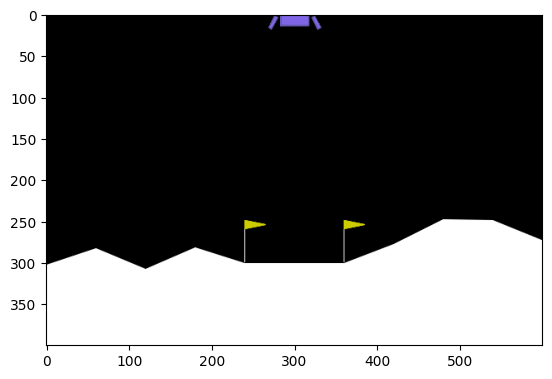

In [ ]:
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
from matplotlib import animation


d = Display()
d.start()

# env = gym.make(ENV_NAME, render_mode="rgb_array")

obs, _ = env.reset()

# print(type(obs), len(obs), type(obs[0]), type(obs[1]))

# vec_env = model.get_env()
# obs = vec_env.reset()
# model.predict(obs)

img = []
for _ in range(300):
    action, _states = model.predict(obs, deterministic=True)
    obs, reward, terminated, truncated, _ = env.step(action)

    display.clear_output(wait=True)
    img.append(env.render())

    # if d:
    #     env.reset()

dpi = 72
interval = 50 # ms

# plt.figure(figsize=(img[0].shape[1]/dpi,img[0].shape[0]/dpi),dpi=dpi)
patch = plt.imshow(img[0])
plt.axis=('off')
animate = lambda i: patch.set_data(img[i])
ani = animation.FuncAnimation(plt.gcf(),animate,frames=len(img),interval=interval)
display.display(display.HTML(ani.to_jshtml()))

#### Закрытие среды после тестирования
По завершении тестирования мы закрываем среду с помощью env.close().

In [ ]:
# Закрытие среды после тестирования
env.close()

В рамках самостоятельной работы попробуйте обучить и протестировать модель на другой среды доступной в gymnasium.